In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_diabetes

D:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [40]:
# Şeker Hastalığı Veri Kümesini içe aktarın
x = load_diabetes()
df = pd.DataFrame(x.data, columns = x.feature_names)
df["target"] = x.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [41]:
# Yinelenen değerleri ve eksik verileri kontrol edin
df.duplicated().sum()

0

In [42]:
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [43]:
# Bilgi edinme
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [44]:
# df icin bazi istatistik degerler
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-3.634285e-16,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.308343e-16,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-8.045349e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,1.281655e-16,0.047619,-0.112400,-0.036656,-0.005671,0.035644,0.132044
s1,442.0,-8.835316e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,1.327024e-16,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-4.574646e-16,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,3.777301e-16,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,-3.830854e-16,0.047619,-0.126097,-0.033249,-0.001948,0.032433,0.133599
s6,442.0,-3.412882e-16,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


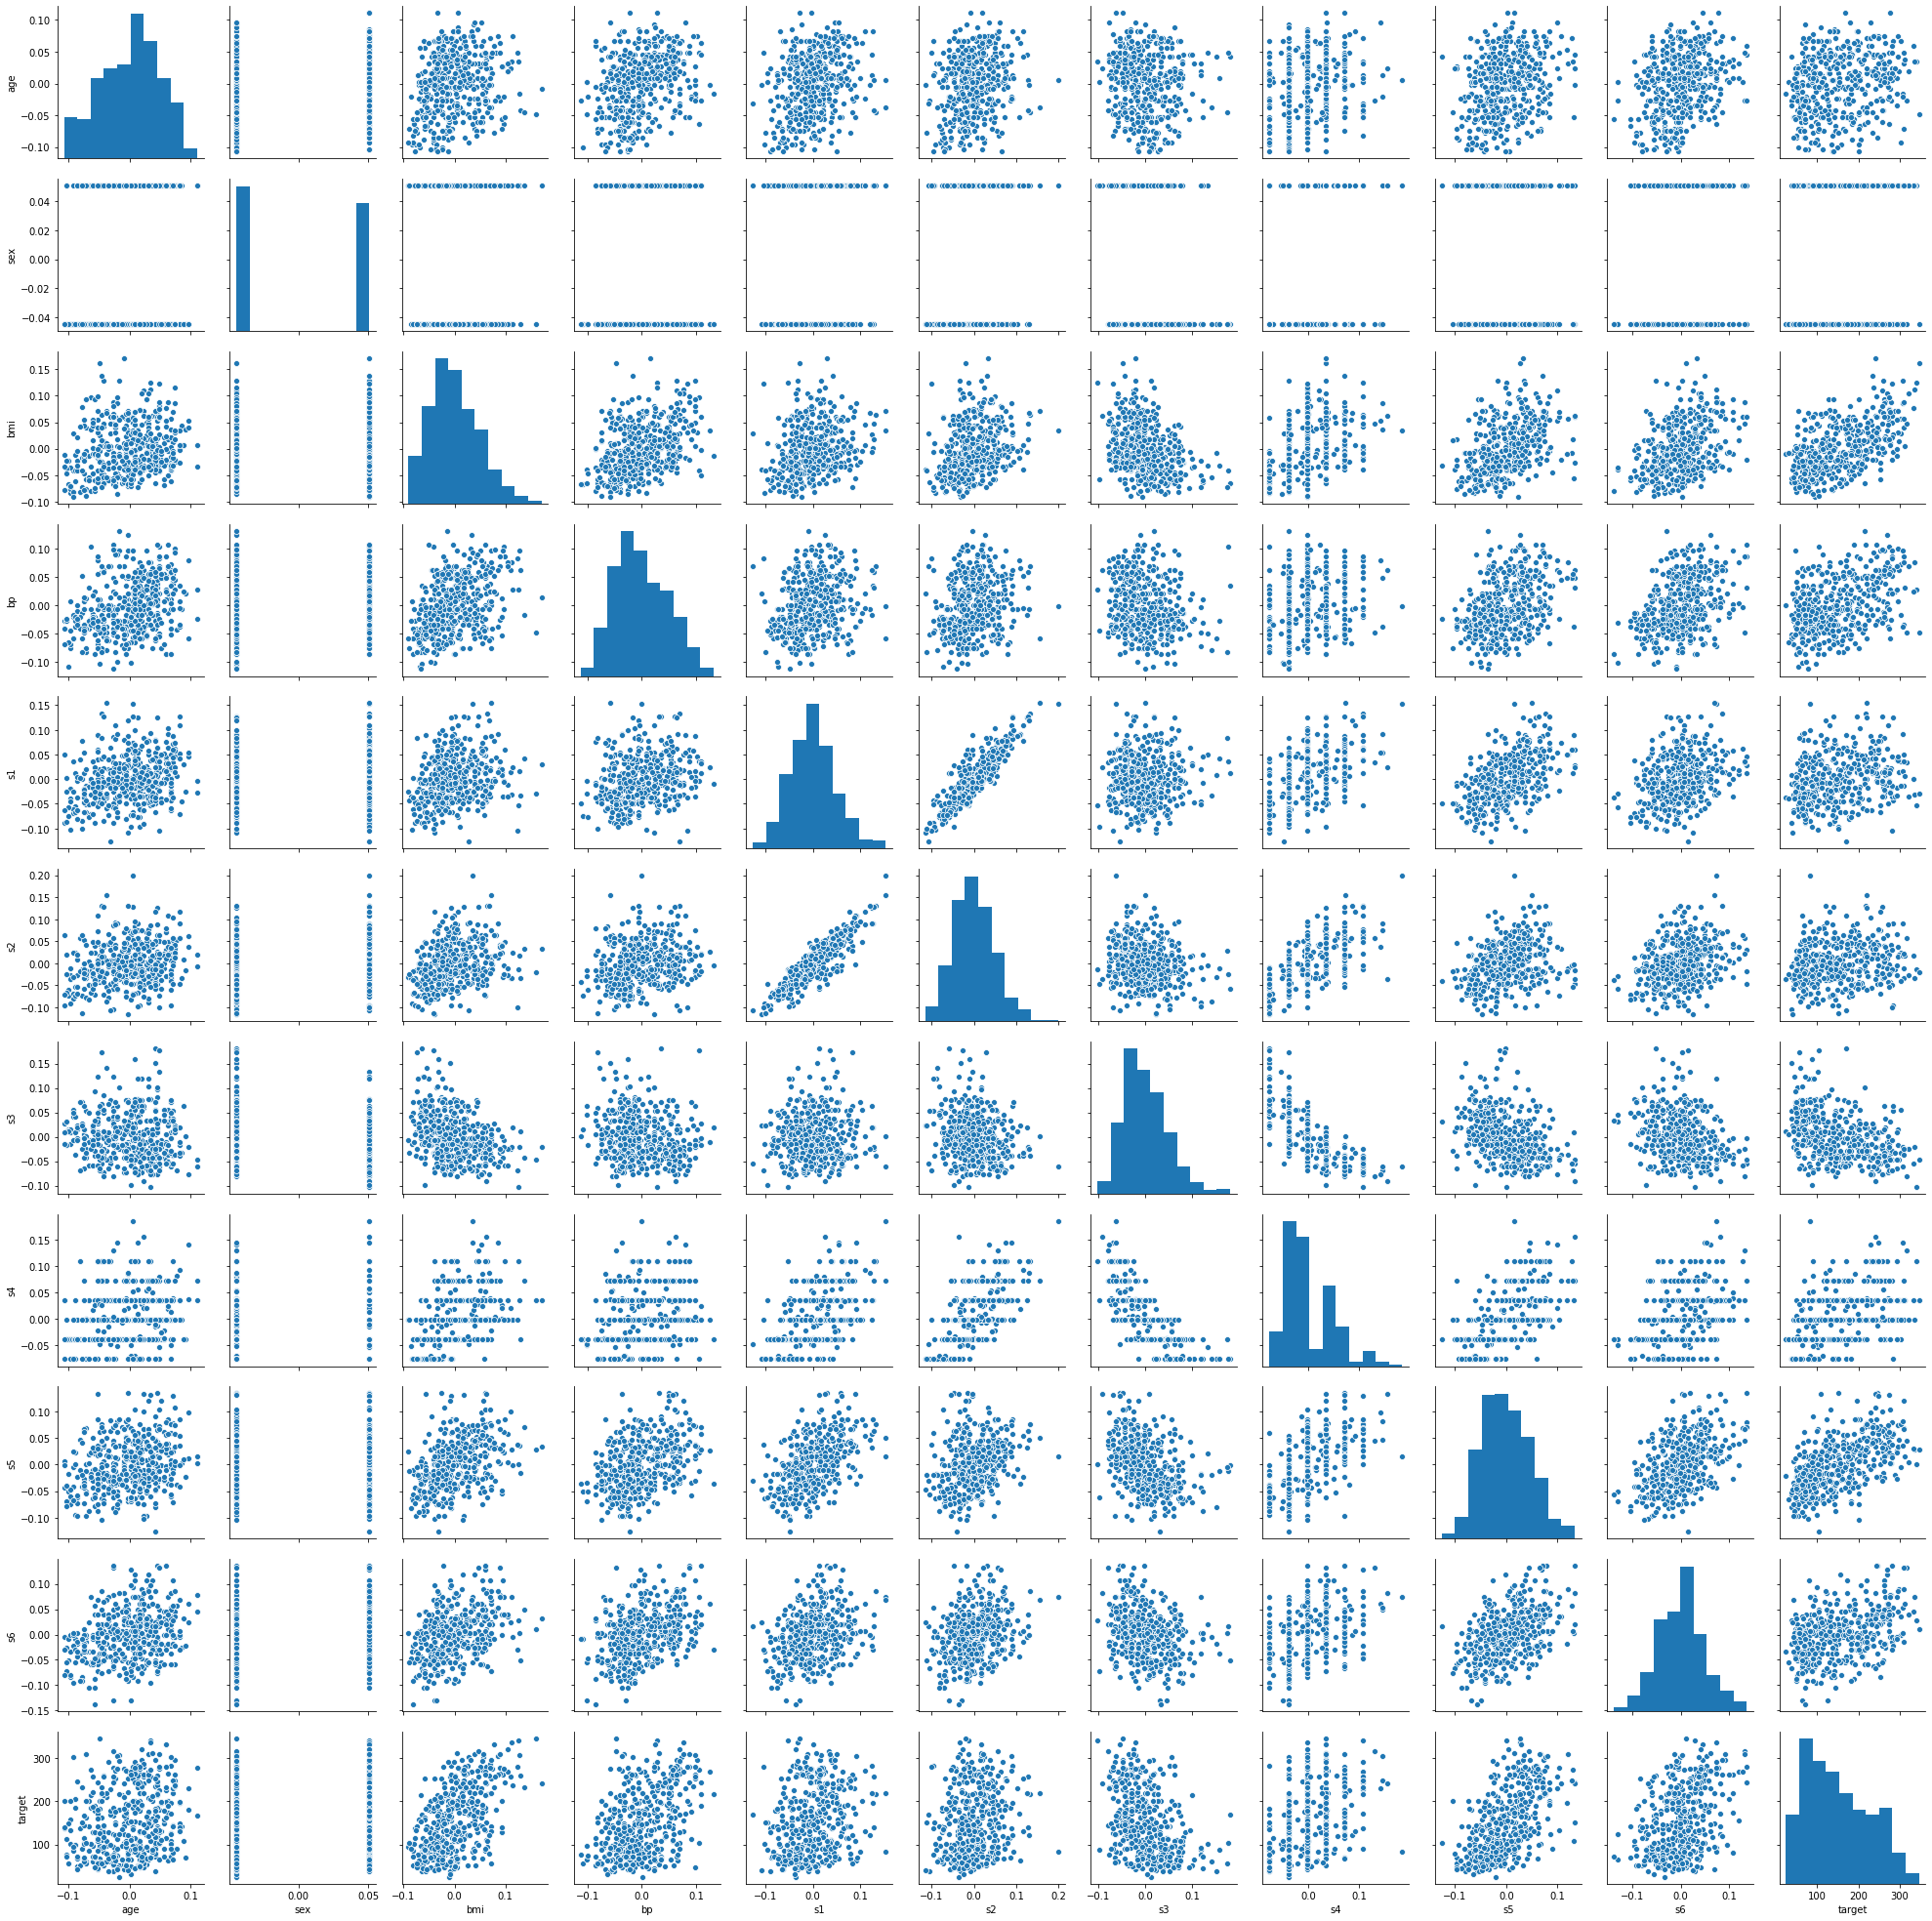

In [7]:
# Her özellik için verileri görselleştirin (pairplot, distplot)
sns.pairplot(df);

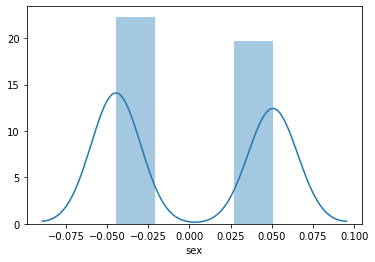

In [8]:
sns.distplot(df["sex"]);

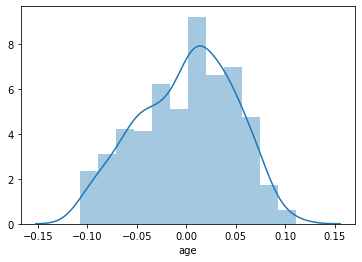

In [9]:
sns.distplot(df["age"]);

In [45]:
# Korelasyon matrisini bastırın ve yorumlayın
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


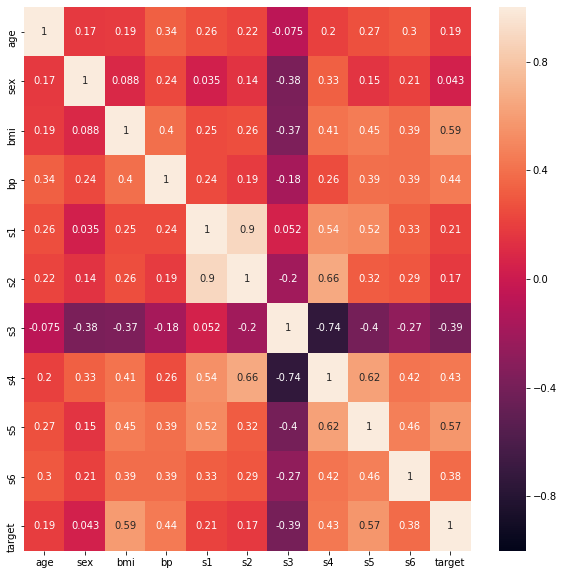

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(),vmin = -1, vmax = 1, annot = True);

In [2]:
# Yukarida degerlere bakacak olursak, bizim hedef degiskenimiz olan "target" degiskeni ile sadece iki degisken ("bmi" ve "s5") arasinda pozitif yonde anlamli bir
# iliski var. Boylece biz sadece bu iki degiskeni modelimiz icin kullanabiliriz. Cunki diger bagimsiz degiskenler bizim hedef degiskenimiz olan "target"
# degiskenimizi anlamli sekilde etkilemiyor. Bunun yani sira model kurmak icin kullanacagimiz "bmi" ve "s5" arasinda anlamli iski olmamasi lazim.
#Eger onlar arasinda da anlamli iliski varsa birini eleyip "target" degiskenini en fazla etkileyen degiskeni secmemiz lazim.
#Bizim problemimizde "bmi" ve "s5" arasinda 0.45lik bir iliski var ve biz bu durumda her iki degiskeni kullanabilir.

In [47]:
df_new = df[["bmi","s5","target"]]
df_new.head()

,bmi,s5,target
0,0.061696,0.019908,151.0
1,-0.051474,-0.068330,75.0
2,0.044451,0.002864,141.0
3,-0.011595,0.022692,206.0
4,-0.036385,-0.031991,135.0


In [48]:
# Aykırı değerleri işleyin (IsolationForest kullanabilirsiniz)
X = df_new.drop(["target"], axis = 1)
y = df_new[["target"]]
print(X.head())
print(y.head())

        bmi        s5
0  0.061696  0.019908
1 -0.051474 -0.068330
2  0.044451  0.002864
3 -0.011595  0.022692
4 -0.036385 -0.031991
   target
0   151.0
1    75.0
2   141.0
3   206.0
4   135.0


In [49]:
from sklearn.ensemble import IsolationForest
iso_model = IsolationForest(contamination=0.1)
predicted_iso = iso_model.fit_predict(X)

D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [50]:
# outlier'leri temizleyelim
not_outlier = predicted_iso != -1
not_outlier[0:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [51]:
new_X = X[not_outlier]
new_X.shape

(397, 2)

In [54]:
list(new_X.index) == list(y.index)

False

In [55]:
new_y =  y.loc[list(new_X.index)]
new_y.shape

(397, 1)

In [56]:
new_X.reset_index(inplace = True)

In [62]:
new_X.drop("index", axis = 1, inplace = True)

,bmi,s5
0,0.061696,0.019908
1,-0.051474,-0.068330
2,0.044451,0.002864
3,-0.011595,0.022692
4,-0.036385,-0.031991
5,-0.040696,-0.041180
6,-0.047163,-0.062913
7,-0.001895,-0.035817
8,0.061696,-0.014956
9,0.039062,0.067736


In [63]:
new_y.reset_index(inplace = True)

In [65]:
new_y.drop("index", axis = 1, inplace = True)

In [66]:
new_y.head(15)

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
5,97.0
6,138.0
7,63.0
8,110.0
9,310.0


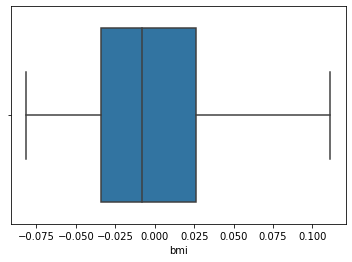

In [69]:
# new_X icerisinde her iki degisken icin de aykiri degerin olmadigini boxplot ile gozlemleyebiliriz
sns.boxplot(new_X["bmi"])

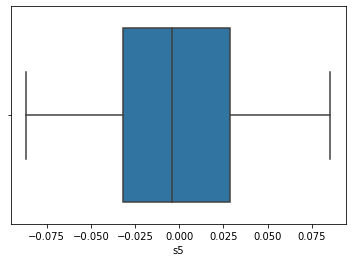

In [70]:
sns.boxplot(new_X["s5"])

In [72]:
# Özellikleri ölçekleyin. (scaling)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_scaled = StandardScaler().fit_transform(new_X)
X_scaled[0:10]

array([[ 1.55088872,  0.53567211],
       [-1.16613222, -1.64799737],
       [ 1.13686648,  0.11386049],
       [-0.20870579,  0.60455915],
       [-0.80386276, -0.74871718],
       [-0.90736832, -0.97612001],
       [-1.06262666, -1.51394555],
       [ 0.02418171, -0.84338318],
       [ 1.55088872, -0.32714513],
       [ 1.00748453,  1.71929076]])

In [73]:
# eğitim için 0.7 ve test için 0.3 oran olacak şekilde
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, new_y, test_size = 0.30, random_state = 30)

In [123]:
# Lasso ve Rdige modellerini Sklearn'dan içe aktarın.
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import r2_score

In [124]:
# Ridge için 5 farklı alfa değeri tanımlayın ve modelleri eğitin. R^2 değerlerini 
# hem eğitim hem de test verisetleri için yazdırın.

In [102]:
# Ridge modeli icin 5 tane farkli alpha degeri denemek ve 10 katli CV yapmak
alphas_ = [0.1, 1, 0.02, 0.5, 2]

In [103]:
ridgecv = RidgeCV(alphas = alphas_, cv = 10).fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [104]:
# En iyi alpha degeri
ridgecv.alpha_

2.0

In [116]:
ridgecv_model = Ridge(alpha = 2).fit(X_train, y_train)

In [117]:
print("Ridge Train:  ", ridgecv_model.score(X_train, y_train))
print("Ridge Test:  ", ridgecv_model.score(X_test, y_test))

Ridge Train:   0.42553893750763006
Ridge Test:   0.3770173351985179


In [125]:
# Lasso için 5 farklı alfa değeri tanımlayın ve modelleri eğitin. R^2 değerlerini 
# hem eğitim hem de test verisetleri için yazdırın.

In [ ]:
# lasso modeli icin 5 tane farkli alpha degeri denemek ve 10 katli CV yapmak

In [118]:
alphas = [0.01, 0.2, 3, 0.0002, 0.01]

In [119]:
lassocv_model = LassoCV(alphas = alphas, cv = 10).fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [120]:
# En iyi alpha degeri
lassocv_model.alpha_

0.2

In [134]:
lassocv_model = Lasso(alpha = 0.2).fit(X_train, y_train)

In [135]:
print("Lasso Train: ", lassocv_model.score(X_train, y_train))
print("Lasso Test: ", lassocv_model.score(X_test, y_test))

Lasso Train:  0.4255393574125005
Lasso Test:  0.37698696369639684


## Sonuçlar hakkında yorum yapın. En iyi modelin katsayısını yazdırın.

In [1]:
# Bu çalışmada gerekli preprocessing işlemlerinden sonra Ridge ve Lasso modelleri için 5 farklı alpha değeri denedim. Ridge için optimum alpha değeri 2,
# Lasso için ise 0.2 oldu. Sonuçlara bakacak olursak her iki modelin performansları birbirilerine çok yakındı. Ama modellerin test seti üzerindeki
# performanslarına bakacak olursak Ridge Lasso'dan bir az daha başarılı oldu:

In [138]:
print("Ridge Test:  ", ridgecv_model.score(X_test, y_test))
print("Lasso Test: ", lassocv_model.score(X_test, y_test))

Ridge Test:   0.3770173351985179
Lasso Test:  0.37698696369639684
